
### Imports

In [3]:
%load_ext cython
%load_ext cythonmagic
%matplotlib inline
%matplotlib notebook

import pandas as pd
import numpy as np
import scipy as sp

from scipy import * 

import re, reprlib, sys
import matplotlib.pyplot as plt
from itertools import *
import random as ran
from logging import *
from pprint import *
from time import *
import shlex, subprocess


import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

from scipy.cluster.vq import *

import nltk as n
import nltk, nltk.classify.util, nltk.metrics, nltk.tokenize, nltk.stem
from nltk.corpus import *
from nltk.stem import *
from nltk.classify import *
from nltk.collocations import *
from nltk.metrics import *
from nltk.probability import *
from nltk.classify.scikitlearn import *
from nltk.tag.sequential import *
from nltk.tag import *
from nltk.tag.util import *
# n.download()

from sklearn_pandas import *

import sklearn as sk
from sklearn import *
from sklearn.feature_extraction.text import *
from sklearn.svm import *
from sklearn.preprocessing import *
from sklearn.cross_validation import *
from sklearn.pipeline import *
from sklearn.multiclass import *
from sklearn.datasets import *
from sklearn.naive_bayes import *
from sklearn.neighbors import *
from sklearn.feature_selection import *
from sklearn.ensemble import *
from sklearn.linear_model import *
from sklearn.tree import *
from sklearn.grid_search import *
from sklearn.base import *
from sklearn.datasets.twenty_newsgroups import *
from sklearn.decomposition import *
from sklearn.feature_extraction import *
from sklearn.metrics import *
from sklearn.utils import *

sk.utils.check_random_state(5125)
ran.seed(5125)

The cython extension is already loaded. To reload it, use:
  %reload_ext cython
The cythonmagic extension is already loaded. To reload it, use:
  %reload_ext cythonmagic


### Random functions
##### plot_roc_curve

0.547043216373


<IPython.core.display.Javascript object>


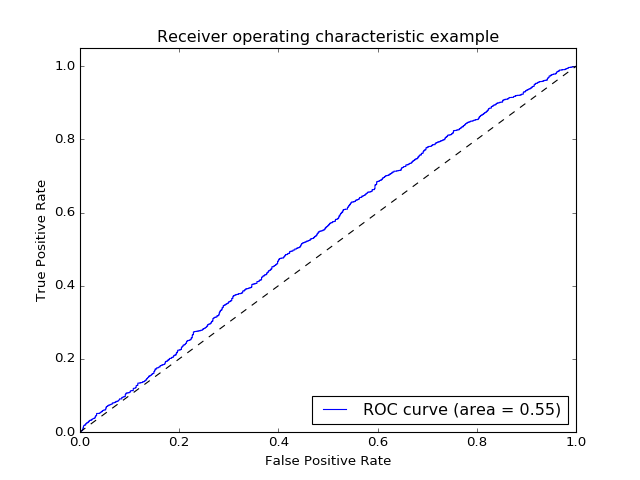

In [58]:
def plot_roc_curve(test_class, y_score):
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
                               #  test_class_opn y_score_opn 
    fpr, tpr, _ = roc_curve(test_class, y_score[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    print(roc_auc)
    plt.figure()
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
plot_roc_curve(test_class_opn, y_score_opn)

##### train_test_at_once

In [80]:
def train_test_at_once(nick_names, classifiers, trait_input, train_feat_trait, test_feat_trait, train_class_trait, test_class_trait, trait_X, trait_Y, skf_trait):
    for name, clf in zip(nick_names, classifiers):
        clf.fit(train_feat_trait[["StringLength", 
          "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
          "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], train_class_trait)
        y_pred_trait = clf.predict(test_feat_trait[["StringLength", 
          "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
          "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]])
        
        print("\nFOR:", name)
        print(sk.metrics.classification_report(test_class_trait, y_pred_trait, labels=[0, 1], target_names=["0", "1"]))
        print(sk.metrics.confusion_matrix(test_class_trait, y_pred_trait, labels=[0, 1]))
        print("F1: ", sk.metrics.f1_score(test_class_trait, y_pred_trait, labels=[0, 1], average='binary'))
        print("Precision: ", sk.metrics.average_precision_score(test_class_trait, y_pred_trait, average='micro'))
        print("Recall: ", sk.metrics.recall_score(test_class_trait, y_pred_trait, labels=[0, 1], average='binary'))

        np.savetxt("/home/jm/Documents/caseSolvingSeminar/raw_data/y_pred_class_labels/" + trait_input + "_pred" + name + ".csv", y_pred_trait, delimiter=",", fmt='%1.0f')

        scores = sk.cross_validation.cross_val_score(clf, trait_X[["StringLength", 
                      "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                      "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], trait_Y, cv=skf_trait, scoring='accuracy')
        print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std()*2, name))
        print("Accuracy score: ", sk.metrics.accuracy_score(test_class_trait, y_pred_trait))

### R script adding new features to dataset 

In [4]:
# http://www.mango-solutions.com/wp/2015/10/integrating-python-and-r-part-ii-executing-r-from-python-and-vice-versa/
command = 'Rscript'
path2script = 'insert_features.R'

# Build subprocess command
cmd = [command, path2script]

subprocess.check_output(cmd, universal_newlines=True)

''

In [59]:
data_n = pd.read_csv("../raw_data/data_n.csv", parse_dates=True, infer_datetime_format=True)
data_n.head(n=2)

,Unnamed: 0,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,...,Number_of_Dots,Number_of_Commas,Number_of_Semicolons,Number_of_Colons,Average_Word_Length,Lexical_Diversity,Number_of_FunctionalWords,Number_of_Pronouns,Number_of_PROPNAMEs,SentimentNumeric
0,1,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3,3.15,3.25,4.4,n,y,...,1,0,0,0,4.400,0.700,2,0,0,2
1,2,b7b7764cfa1c523e4e93ab2a79a946c4,is so sleepy it's not even funny that's she ca...,2.65,3,3.15,3.25,4.4,n,y,...,1,0,0,0,3.615,0.577,10,1,0,0


### Replace 'y' and 'n'   AND easy split

In [6]:
# http://stackoverflow.com/a/17702781
d = {'n': 0, 'y': 1} # 1, y, = TRUE             0, n = FALSE
data_n = data_n.replace(d)
data_n.head(n=1)

,Unnamed: 0,#AUTHID,STATUS,sEXT,sNEU,sAGR,sCON,sOPN,cEXT,cNEU,...,Number_of_Dots,Number_of_Commas,Number_of_Semicolons,Number_of_Colons,Average_Word_Length,Lexical_Diversity,Number_of_FunctionalWords,Number_of_Pronouns,Number_of_PROPNAMEs,SentimentNumeric
0,1,b7b7764cfa1c523e4e93ab2a79a946c4,likes the sound of thunder.,2.65,3,3.15,3.25,4.4,0,1,...,1,0,0,0,4.4,0.7,2,0,0,2


In [7]:
#norm:http://blog.yhat.com/posts/predicting-customer-churn-with-sklearn.html
# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# to_drop = ['State','Area Code','Phone','Churn?']
# churn_feat_space = data_n.drop(to_drop,axis=1)

In [8]:
neu = data_n[["#AUTHID","STATUS","cNEU","StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]
ext = data_n[["#AUTHID","STATUS","cEXT", "StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]
agr = data_n[["#AUTHID","STATUS","cAGR","StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]
con = data_n[["#AUTHID","STATUS","cCON","StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]
opn = data_n[["#AUTHID","STATUS","cOPN", "StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]]

### Split stratified k-folds

In [9]:
# neu = data_n[["#AUTHID","STATUS","cNEU"]]
# train_neu, test_neu, y_train, y_test = sk.cross_validation.train_test_split(neu, neu["cNEU"], train_size = 0.66, stratify= neu["cNEU"])
# train_neu, test_neu, y_train, y_test 

In [10]:
train_feat_neu, test_feat_neu, train_class_neu, test_class_neu = sk.cross_validation.train_test_split(neu, neu["cNEU"], train_size = 0.66, stratify = neu["cNEU"],random_state= 5152)
print(train_feat_neu.shape, test_feat_neu.shape,train_class_neu.shape ,test_class_neu.shape)

neu_X = train_feat_neu.append(test_feat_neu)
neu_Y = train_class_neu.append(test_class_neu)

train_feat_ext, test_feat_ext, train_class_ext, test_class_ext = sk.cross_validation.train_test_split(ext, ext["cEXT"], train_size = 0.66, stratify = ext["cEXT"],random_state= 5152)

ext_X = train_feat_ext.append(test_feat_ext)
ext_Y = train_class_ext.append(test_class_ext)

train_feat_agr, test_feat_agr, train_class_agr, test_class_agr = sk.cross_validation.train_test_split(agr, agr["cAGR"], train_size = 0.66, stratify = agr["cAGR"],random_state= 5152)

agr_X = train_feat_agr.append(test_feat_agr)
agr_Y = train_class_agr.append(test_class_agr)

train_feat_con, test_feat_con, train_class_con, test_class_con = sk.cross_validation.train_test_split(con, con["cCON"], train_size = 0.66, stratify = con["cCON"],random_state= 5152)

con_X = train_feat_con.append(test_feat_con)
con_Y = train_class_con.append(test_class_con)

train_feat_opn, test_feat_opn, train_class_opn, test_class_opn = sk.cross_validation.train_test_split(opn, opn["cOPN"], train_size = 0.66, stratify = opn["cOPN"],random_state= 5152)

opn_X = train_feat_opn.append(test_feat_opn)
opn_Y = train_class_opn.append(test_class_opn)

(6545, 15) (3372, 15) (6545,) (3372,)


In [11]:
test_class_ext.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/ext_test.csv",  header=None,  encoding="utf-8")
test_class_neu.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/neu_test.csv",  header=None,  encoding="utf-8")
test_class_agr.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/agr_test.csv",  header=None,  encoding="utf-8")
test_class_con.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/con_test.csv",  header=None,  encoding="utf-8")
test_class_opn.to_csv("/home/jm/Documents/caseSolvingSeminar/raw_data/test_class_labels/opn_test.csv",  header=None,  encoding="utf-8")

In [12]:
skf_neu = StratifiedKFold(neu["cNEU"], n_folds=10, shuffle=True, random_state = 5152)
skf_ext = StratifiedKFold(ext["cEXT"], n_folds=10, shuffle=True, random_state = 5152)
skf_agr = StratifiedKFold(agr["cAGR"], n_folds=10, shuffle=True, random_state = 5152)
skf_con = StratifiedKFold(con["cCON"], n_folds=10, shuffle=True, random_state = 5152)
skf_opn = StratifiedKFold(opn["cOPN"], n_folds=10, shuffle=True, random_state = 5152)

### Types of classifiers 
with their configuration

In [74]:
nick_names = ["SVC", "LinearSVC", "Multinomia-NB", "Bernoulli-NB", "RF", "AdaB", "kNN"]
classifiers = [
    SVC(cache_size=500, kernel = "rbf", decision_function_shape = "ovr", random_state = 5152),
    LinearSVC(random_state = 5152),
    MultinomialNB(),
    BernoulliNB(),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1, n_jobs=-1, random_state = 5152),
    AdaBoostClassifier(random_state = 5152),
    KNeighborsClassifier()]

### Train + Test NEU

read: https://stackoverflow.com/questions/31421413/how-to-compute-precision-recall-accuracy-and-f1-score-for-the-multiclass-case

In [83]:
train_test_at_once(nick_names, classifiers, trait_neu, train_feat_neu, test_feat_neu, train_class_neu, test_class_neu, neu_X, neu_Y, skf_neu)

NameError: name 'trait_neu' is not defined

In [40]:
eclf = VotingClassifier(estimators=[
        ("svc", ttSVC),
        ("linear_svc", ttLinearSVC)], voting='hard')


for clf, label in zip([ttSVC, ttLinearSVC], ["SVC", "LSVC"]):
    scores = cross_validation.cross_val_score(clf, neu_X[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity"]], neu_Y, cv=skf, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std()*2, label))
    print(scores)

NameError: name 'ttSVC' is not defined

### Train + Test EXT

In [73]:
train_test_at_once(nick_names, classifiers, ext, train_feat_ext, test_feat_ext, train_class_ext, test_class_ext, ext_X, ext_Y, skf_ext)


FOR: tt SVC
             precision    recall  f1-score   support

          0       0.58      0.86      0.70      1941
          1       0.47      0.17      0.25      1431

avg / total       0.54      0.57      0.51      3372

[[1673  268]
 [1190  241]]
F1:  0.248453608247
Precision:  0.497398695233
Recall:  0.168413696716


TypeError: Could not compare ['/home/jm/Documents/caseSolvingSeminar/raw_data/y_pred_class_labels/'] with block values

### Train + Test CON

In [42]:
# print(classifiers, nick_names)
for name, clf in zip(nick_names, classifiers):
    clf.fit(train_feat_con[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], train_class_con)
    y_pred_con = clf.predict(test_feat_con[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]])
    print("\nFOR:", name)
    print(sk.metrics.classification_report(test_class_con, y_pred_con, labels=[0, 1], target_names=["0", "1"]))
    print(sk.metrics.confusion_matrix(test_class_con, y_pred_con, labels=[0, 1]))
    print("F1: ", sk.metrics.f1_score(test_class_con, y_pred_con, labels=[0, 1], average='binary'))
    print("Precision: ", sk.metrics.average_precision_score(test_class_con, y_pred_con, average='micro'))
    print("Recall: ", sk.metrics.recall_score(test_class_con, y_pred_con, labels=[0, 1], average='binary'))

    np.savetxt("/home/jm/Documents/caseSolvingSeminar/raw_data/y_pred_class_labels/con_pred" + name + ".csv", y_pred_con, delimiter=",", fmt='%1.0f')
    
    scores = sk.cross_validation.cross_val_score(clf, con_X[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], con_Y, cv=skf_con, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std()*2, name))
    print("Accuracy score: ", sk.metrics.accuracy_score(test_class_con, y_pred_con))
    print("Area Under the Curve (AUC): ", sk.metrics.roc_auc_score(test_class_con, y_pred_con))


FOR: tt SVC
             precision    recall  f1-score   support

          0       0.55      0.71      0.62      1823
          1       0.49      0.32      0.39      1549

avg / total       0.52      0.53      0.52      3372

[[1303  520]
 [1049  500]]
F1:  0.389256520047
Precision:  0.562038157472
Recall:  0.322788896062


KeyboardInterrupt: 

### Train + Test AGR

In [43]:
# print(classifiers, nick_names)
for name, clf in zip(nick_names, classifiers):
    clf.fit(train_feat_agr[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], train_class_agr)
    y_pred_agr = clf.predict(test_feat_agr[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]])
    print("\nFOR:", name)
    print(sk.metrics.classification_report(test_class_agr, y_pred_agr, labels=[0, 1], target_names=["0", "1"]))
    print(sk.metrics.confusion_matrix(test_class_agr, y_pred_agr, labels=[0, 1]))
    print("F1: ", sk.metrics.f1_score(test_class_agr, y_pred_agr, labels=[0, 1], average='binary'))
    print("Precision: ", sk.metrics.average_precision_score(test_class_agr, y_pred_agr, average='micro'))
    print("Recall: ", sk.metrics.recall_score(test_class_agr, y_pred_agr, labels=[0, 1], average='binary'))

    np.savetxt("/home/jm/Documents/caseSolvingSeminar/raw_data/y_pred_class_labels/agr_pred" + name + ".csv", y_pred_agr, delimiter=",", fmt='%1.0f')
    
    scores = sk.cross_validation.cross_val_score(clf, agr_X[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], agr_Y, cv=skf_agr, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std()*2, name))
    print("Accuracy score: ", sk.metrics.accuracy_score(test_class_agr, y_pred_agr))
    print("Area Under the Curve (AUC): ", sk.metrics.roc_auc_score(test_class_agr, y_pred_agr))


FOR: tt SVC
             precision    recall  f1-score   support

          0       0.49      0.34      0.40      1581
          1       0.54      0.68      0.60      1791

avg / total       0.51      0.52      0.51      3372

[[ 545 1036]
 [ 578 1213]]
F1:  0.600495049505
Precision:  0.694018856476
Recall:  0.677275265215
Accuracy: 0.514 (+/- 0.02) [tt SVC]
Accuracy score:  0.521352313167
Area Under the Curve (AUC):  0.510996898895

FOR: tt Linear SVC
             precision    recall  f1-score   support

          0       0.54      0.01      0.02      1581
          1       0.53      0.99      0.69      1791

avg / total       0.53      0.53      0.38      3372

[[  15 1566]
 [  13 1778]]
F1:  0.692502434275
Precision:  0.764147664282
Recall:  0.992741485204
Accuracy: 0.503 (+/- 0.07) [tt Linear SVC]
Accuracy score:  0.531731909846
Area Under the Curve (AUC):  0.501114575619

FOR: tt MultinomiaNB
             precision    recall  f1-score   support

          0       0.54      0.16  

### Train + Test OPN

In [44]:
# print(classifiers, nick_names)
for name, clf in zip(nick_names, classifiers):
    clf.fit(train_feat_opn[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], train_class_opn)
    y_pred_opn = clf.predict(test_feat_opn[["StringLength", 
                  "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
                  "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]])
    
#     y_score_opn = clf.decision_function(test_feat_opn[["StringLength", 
#                   "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
#                   "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]])
    
    print("\nFOR:", name)
    print(sk.metrics.classification_report(test_class_opn, y_pred_opn, labels=[0, 1], target_names=["0", "1"]))
    print(sk.metrics.confusion_matrix(test_class_opn, y_pred_opn, labels=[0, 1]))
    print("F1: ", sk.metrics.f1_score(test_class_opn, y_pred_opn, labels=[0, 1], average='binary'))
    print("Precision: ", sk.metrics.average_precision_score(test_class_opn, y_pred_opn, average='micro'))
    print("Recall: ", sk.metrics.recall_score(test_class_opn, y_pred_opn, labels=[0, 1], average='binary'))

#     np.savetxt("/home/jm/Documents/caseSolvingSeminar/raw_data/y_pred_class_labels/opn_pred" + name + ".csv", y_pred_opn, delimiter=",", fmt='%1.0f')
    
#     scores = sk.cross_validation.cross_val_score(clf, opn_X[["StringLength", 
#                   "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
#                   "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], opn_Y, cv=skf_opn, scoring='accuracy')
#     print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std()*2, name))
    print("Accuracy score: ", sk.metrics.accuracy_score(test_class_opn, y_pred_opn))


FOR: tt SVC
             precision    recall  f1-score   support

          0       0.42      0.01      0.01       866
          1       0.74      1.00      0.85      2506

avg / total       0.66      0.74      0.64      3372

[[   5  861]
 [   7 2499]]
F1:  0.852028639618
Precision:  0.871516311623
Recall:  0.997206703911
Accuracy score:  0.742586002372
nArea Under the Curve (AUC):  0.501490187983

FOR: tt Linear SVC
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       866
          1       0.74      1.00      0.85      2506

avg / total       0.55      0.74      0.63      3372

[[   0  866]
 [   0 2506]]
F1:  0.852670976523
Precision:  0.871589561091
Recall:  1.0
Accuracy score:  0.743179122183
nArea Under the Curve (AUC):  0.5

FOR: tt MultinomiaNB
             precision    recall  f1-score   support

          0       0.62      0.02      0.03       866
          1       0.75      1.00      0.85      2506

avg / total       0.71    

In [55]:
clf = MultinomialNB()
clf.fit(train_feat_opn[["StringLength", 
      "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
      "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]], train_class_opn)
y_pred_opn = clf.predict(test_feat_opn[["StringLength", 
      "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
      "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]])

y_score_opn = clf.predict_proba(test_feat_opn[["StringLength", 
      "Number_of_Words", "Number_of_Dots", "Number_of_Commas", "Number_of_Semicolons", 
      "Number_of_Colons", "Average_Word_Length", "Lexical_Diversity", "Number_of_FunctionalWords", "Number_of_Pronouns", "Number_of_PROPNAMEs", "SentimentNumeric"]])